# Simulations and Statistical Inference

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Set random number seed for reproucibility

In [3]:
set.seed(42)

## Generating numbers

Using the `c` function

In [4]:
c(1,2,3,5,8,13)

[1]  1  2  3  5  8 13

Using the `:` operator

In [5]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [6]:
10:1

[1] 10  9  8  7  6  5  4  3  2  1

Using the `seq` function

In [7]:
seq(1, 10)

[1]  1  2  3  4  5  6  7  8  9 10

In [8]:
seq(1, 10, 2)

[1] 1 3 5 7 9

In [9]:
seq(10, 1, -1)

[1] 10  9  8  7  6  5  4  3  2  1

In [10]:
seq(0, 1, length.out = 11)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

## Using `rep`

`rep` is useful for generating repeating data patterns.

In [11]:
rep(3, 5)

[1] 3 3 3 3 3

In [12]:
rep(1:3, times=5)

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

In [13]:
rep(1:3, each=5)

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3

In [14]:
rep(1:3, length.out=10)

[1] 1 2 3 1 2 3 1 2 3 1

## Using `sample`

Simulate `n` tooses of a coin

In [15]:
n <- 10

In [16]:
t1 <- sample(c('H', 'T'), n, replace = TRUE)
t1

[1] "T" "T" "H" "T" "T" "T" "T" "H" "T" "T"

In [17]:
table(t1)

t1
H T 
2 8 

Simulate `n` tosses of a biased coin

In [18]:
t2 <- sample(c('H', 'T'), n, replace = TRUE, prob = c(0.3, 0.7))
t2

[1] "T" "H" "H" "T" "T" "H" "H" "T" "T" "T"

In [19]:
table(t2)

t2
H T 
4 6 

Simulate `n` rolls of a 6-sided die

In [20]:
n <- 100

In [21]:
d1 <- sample(1:6, n, replace=TRUE)
d1

[1] 6 1 6 6 1 4 3 6 3 6 5 5 3 5 1 5 1 2 6 4 3 3 1 6 3 6 6 4 6 4 3 3 3 5 1 5 5
 [38] 2 2 4 5 6 5 4 6 2 2 5 5 2 1 1 2 3 2 5 1 3 4 1 4 1 3 4 5 4 2 1 1 2 5 1 2 6
 [75] 6 5 2 4 5 4 4 2 2 3 6 6 5 5 4 1 4 6 5 3 4 4 1 3 4 5

In [22]:
table(d1)

d1
 1  2  3  4  5  6 
16 14 15 18 20 17 

Sampling without replacement. For example, if we wanted to assiggn 16 samples to treatment A or B at random such that exactly half had each treatment.

In [23]:
sample(rep(c('A', 'B'), each=8))

[1] "A" "A" "B" "A" "B" "A" "B" "B" "A" "B" "B" "A" "A" "B" "B" "A"

## Random number generators

### Disscrete distributionns

Sampling from a Bernoullli distribution returns TRUE for success and FALSE for failure.

In [24]:
rbernoulli(n=10, p=0.5)

[1]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE

In [25]:
as.integer(rbernoulli(n=10, p=0.5))

[1] 0 1 0 0 1 0 1 0 1 1

Sampling from a Binomial distribution returns the number of **successes** in `size` trials for `n` experiments.

In [26]:
rbinom(n=10, p=0.5, size=5)

[1] 2 0 1 3 4 3 3 2 3 1

Sampling from a negative binomial distribution returns the number of **failures** until `size` succcesses are observed for `n` experiemnts.

In [27]:
rnbinom(n=10, size=5, prob=0.5)

[1] 2 5 6 7 6 6 5 1 0 9

Sampling from a Poisson distribution returns the number of **successes** in `n` experiments if the average success rate per experiment is `lambda`.

In [28]:
rpois(n=10, lambda = 3)

[1] 3 5 3 1 3 7 3 2 2 3

**Note**:  We can give different parameters for each experiment in these distributios.

In [54]:
rpois(n=10, lambda=1:10)

[1] 2 2 3 5 6 3 6 8 9 9

### Continuous distributions

Sampling from a stnadard uniform distribution.

In [29]:
runif(5)

[1] 0.64987584 0.33641913 0.06094975 0.45131085 0.83875503

Sampling form a uniform distribuiotn,

In [30]:
runif(5, 90, 100)

[1] 95.74637 93.53350 95.47426 98.92719 94.89991

Sampling from a stnadard normal distribution.

In [31]:
rnorm(5)

[1] -0.9477353  1.7679778  0.9173278 -0.8947754 -0.6881659

## Looping

In [90]:
for (i in 1:10) {
    print(mean(rnorm(10)))
}

[1] 0.2660734
[1] -0.09742615
[1] -0.3068994
[1] 0.2910631
[1] 0.1062726
[1] 0.05955272
[1] 0.4080255
[1] -0.1243275
[1] -0.779981
[1] -0.187303


Saving variabels generated in a loop

In [91]:
n <- 10
vars <- numeric(n)
for (i in 1:n) {
    vars[i] <- mean(rnorm(10))
}
vars

[1] -0.25116756  0.70891664  0.46155152 -0.47555776 -0.05988413  0.27256923
 [7]  0.05437367  0.13500266 -0.19071919  0.03879893

## Using `replicate`

`replicate` is like `rep` but works for a function (such as a random number geenerator)

In [32]:
replicate(3, rnorm(5))

-0.9984839,0.15461594,-0.88368060
-2.1072414,-0.80160087,0.07714041
0.8574190,-0.04518119,0.83720136
1.1260757,-1.03824075,0.09992556
-0.1983684,1.55953311,0.30272834


`replicate` is quite useful for simulations. For exampe, suppose we want to know the distribution of the sample mean  if we sampled 100 numbers from the standard normal distribution 1,000 times.

In [ ]:
n_expts <- 1000
n <- 100

### Using for loop

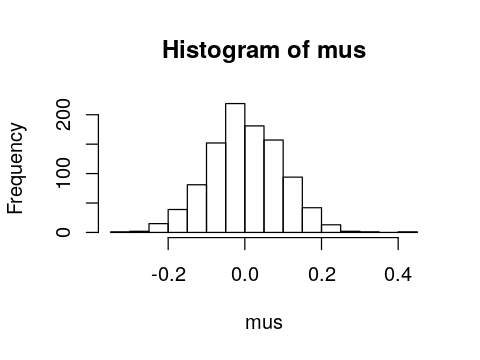

In [86]:
set.seed(123)
mus <- numeric(n_expts)
for (i in 1:n_expts) {
    mus[i] <- mean(rnorm(n))
}
hist(mus)

### Using replicate

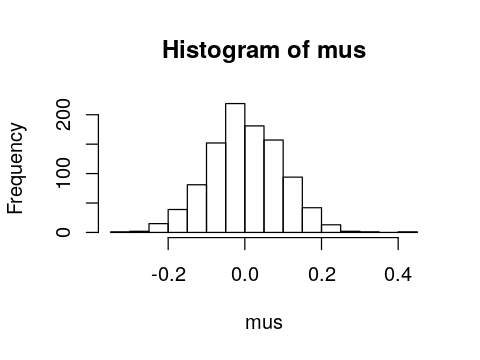

In [89]:
set.seed(123)
mus <- replicate(n_expts, mean(rnorm(n)))
hist(mus)

## Makign a `data.frame` of simulated data

Let's simulate the following experiment. 

- There are 10 subjects in Group A and 10 subjects in Group B with ranodm PIDs from 10000-99999
- We measure 5 genes in each subject. The genes have the same distribution for each subject, but different genes have differnt distribtutions:
    - gene1 $\sim N(10, 1)$
    - gene2 $\sim N(11, 2)$
    - gene3 $\sim N(12, 3)$
    - gene4 $\sim N(13, 4)$
    - gene5 $\sim (N(14, 5)$

In [48]:
replicate(5, rnorm(3, 1:5, 1))

0.6536426,1.334889,1.5432302,0.6573478,2.249920
1.3585636,2.068446,0.8936747,4.2271172,3.146313
3.4023661,2.388056,2.6394386,1.5861398,2.943069


In [75]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

In [76]:
pids <- sample(min_pid:max_pid, n_groups*n)
groups <- sample(rep(groupings, each=n))
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')
colnames(genes) <- gene_names

In [77]:
df <- data.frame(
    pid = pids,
    grp = groups,
    genes
)

In [58]:
sample_n(df, 3)

,pid,grp,gene001,gene002,gene003,gene004,gene005
16,38729,B,1.530708,8.613943,10.617613,9.215513,9.880912
13,22215,B,14.545609,10.625483,6.288087,9.741466,9.624057
14,89658,A,13.008224,14.321570,8.115676,12.608564,7.962775


### Breakdown of simjulation

Set up simulation confiugration parameters.

In [70]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

Create unique PIDs for each subject

In [62]:
pids <- sample(min_pid:max_pid, n_groups*n)

Assign a group to each subject at ranodm

In [67]:
groups <- sample(rep(groupings, each=n))

Make up 5 genes from different distributions for each subject

In [68]:
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))

Make nice names for each gene

In [71]:
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')

Assign names to gene columns

In [72]:
colnames(genes) <- gene_names

Create `data.frame` to storre simulated data

In [73]:
df <- data.frame(
    pid = pids,
    grp = groups,
    genes
)

Peek into `data.frame`

In [74]:
sample_n(df, 3)

,pid,grp,gene001,gene002,gene003,gene004,gene005
16,72254,B,10.726324,9.749522,9.772832,19.65021,13.226052
18,21661,B,10.448878,12.689833,13.292832,19.66553,14.330836
14,91408,B,9.125949,11.009273,13.052141,14.95065,8.745456
